# Illustration of the preconditioned matrix

In [32]:
import numpy as np
from numpy.typing import NDArray
from scipy.linalg import sqrtm

# Illustration of the function of preconditioned matrix B
L = np.array([[1, -1], [-1, 1]])
E = np.eye(2)

B_list = [E, E - L * 0.25, E - L * 0.499]
sqrt_B_list = [np.asarray(sqrtm(B_i)) for B_i in B_list]

Q: NDArray[np.float64] = np.diag([0.1, 0.8])
Q_list = [sqrt_B_i @ Q @ sqrt_B_i for sqrt_B_i in sqrt_B_list]

p = np.array([-0.45, -0.45])
p_list = [sqrt_B_i @ p for sqrt_B_i in sqrt_B_list]

x = np.linspace(-0.6, 0.8, 2000)
y = np.linspace(-0.6, 0.8, 2000)
X: NDArray[np.float64]
Y: NDArray[np.float64]
X, Y = np.meshgrid(x, y)


def compute_z(
    qmat: NDArray[np.float64], pvec: NDArray[np.float64]
) -> NDArray[np.float64]:
    return (
        qmat[0, 0] * X**2
        + (qmat[0, 1] + qmat[1, 0]) * X * Y
        + qmat[1, 1] * Y**2
        + pvec[0] * X
        + pvec[1] * Y
    )


Z: NDArray[np.float64] = compute_z(Q, p)
Z_list: list[NDArray[np.float64]] = [
    compute_z(Q_i, p_i) for Q_i, p_i in zip(Q_list, p_list)
]

T = 20
gamma = 0.5

A = E - 0.499 * L
sqrt_C = 0.12 * L

xx_ini = np.array([[-0.5, -0.5]])
xx_list = [np.tile(xx_ini, (T, 1)) for _ in range(3)]
yy_list = [np.zeros((T, 2)) for _ in range(3)]

for i in range(3):
    xx = xx_list[i]
    yy = yy_list[i]
    B_i = B_list[i]
    Q_i = Q_list[i]
    p_i = p_list[i]

    for k in range(T - 1):
        xx[k + 1] = A @ xx[k] - gamma * B_i @ (2 * Q_i @ xx[k] + p_i) - sqrt_C @ yy[k]
        yy[k + 1] = yy[k] + sqrt_C @ xx[k + 1]

In [33]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True  # 使用外部 LaTeX 编译器
plt.rcParams["font.family"] = "serif"  # 设置字体为 LaTeX 的默认 serif 字体
plt.rcParams.update({"font.size": 25})

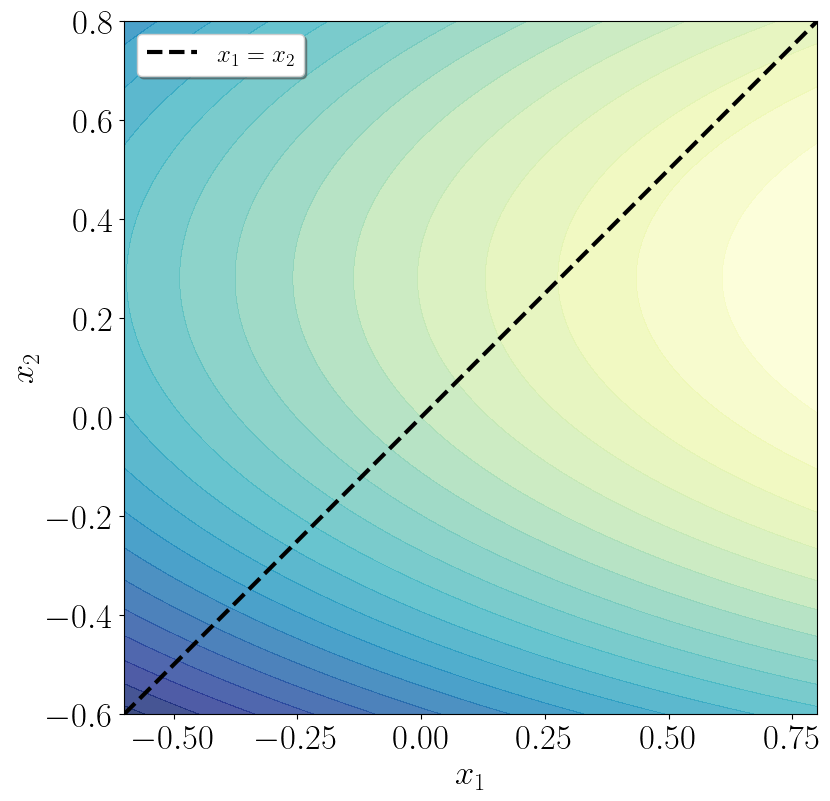

In [34]:
fig1, ax1 = plt.subplots(figsize=(9, 9))
ax1.set_aspect(1)

ax1.contourf(X, Y, Z_list[0], levels=20, cmap="YlGnBu", alpha=0.8)
ax1.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)

ax1.set_xlabel("$x_{1}$")
ax1.set_ylabel("$x_{2}$")
ax1.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()

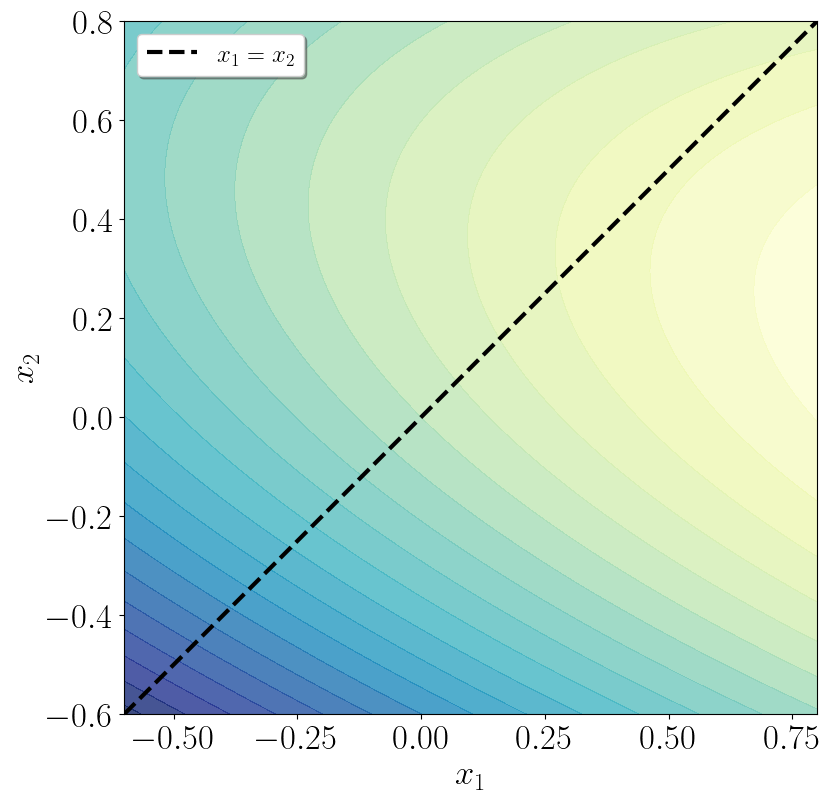

In [35]:
fig2, ax2 = plt.subplots(figsize=(9, 9))
ax2.set_aspect(1)

ax2.contourf(X, Y, Z_list[1], levels=20, cmap="YlGnBu", alpha=0.8)
ax2.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)

ax2.set_xlabel("$x_{1}$")
ax2.set_ylabel("$x_{2}$")
ax2.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()

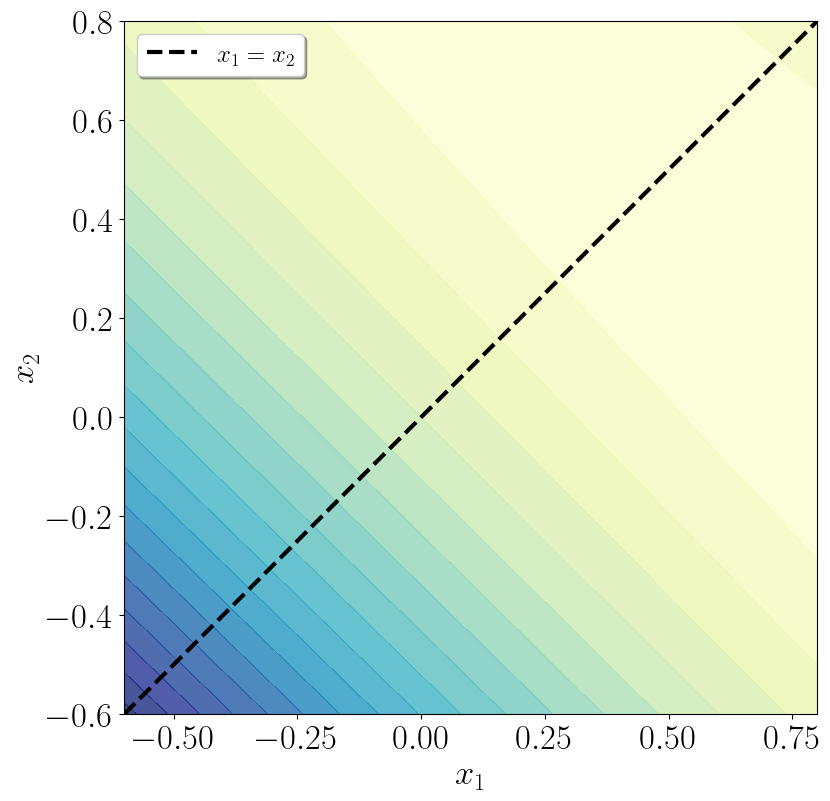

In [36]:
fig3, ax3 = plt.subplots(figsize=(9, 9))
ax3.set_aspect(1)

ax3.contourf(X, Y, Z_list[2], levels=20, cmap="YlGnBu", alpha=0.8)
ax3.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)

ax3.set_xlabel("$x_{1}$")
ax3.set_ylabel("$x_{2}$")
ax3.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()

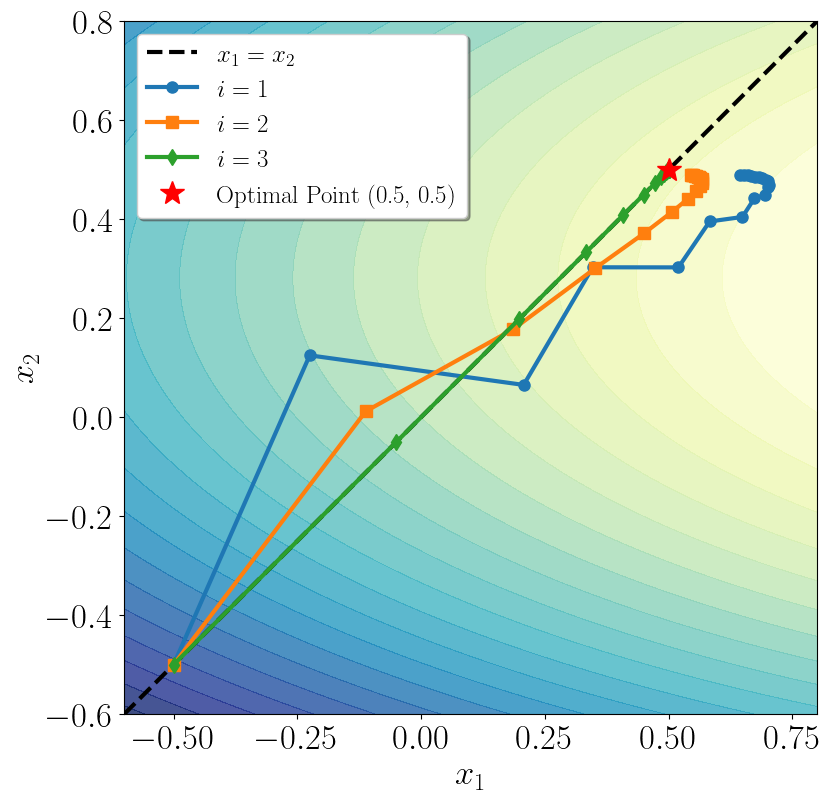

In [37]:
fig4, ax4 = plt.subplots(figsize=(9, 9))
ax4.set_aspect(1)

ax4.set_aspect(1)
ax4.set_xlabel("$x_{1}$")
ax4.set_ylabel("$x_{2}$")
ax4.set_xlim((-0.6, 0.8))
ax4.set_ylim((-0.6, 0.8))

ax4.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)
contour = ax4.contourf(X, Y, Z, levels=20, cmap="YlGnBu", alpha=0.8)

ax4.plot(
    xx_list[0][:, 0], xx_list[0][:, 1], "o-", label="$i=1$", markersize=8, linewidth=3
)
ax4.plot(
    xx_list[1][:, 0], xx_list[1][:, 1], "s-", label="$i=2$", markersize=8, linewidth=3
)
ax4.plot(
    xx_list[2][:, 0], xx_list[2][:, 1], "d-", label="$i=3$", markersize=8, linewidth=3
)

ax4.plot(0.5, 0.5, "r*", markersize=18, label="Optimal Point (0.5, 0.5)")

ax4.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()